# Linear Regression model Section 2
## capitalbikeshare-data [DATA]

# Model 1: Predict Trip Duration (Regression)

### importing requred libraries


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [43]:
import pandas as pd
file_path  = r"C:\Users\Ravichandran\OneDrive\Desktop\202504-capitalbikeshare-tripdata.csv"
bike_data = pd.read_csv(file_path)
bike_data = bike_data.copy() # for prevent data if any crashes



In [44]:
bike_data.info()
bike_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664199 entries, 0 to 664198
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             664199 non-null  object 
 1   rideable_type       664199 non-null  object 
 2   started_at          664199 non-null  object 
 3   ended_at            664199 non-null  object 
 4   start_station_name  484161 non-null  object 
 5   start_station_id    484161 non-null  float64
 6   end_station_name    480151 non-null  object 
 7   end_station_id      480014 non-null  float64
 8   start_lat           664199 non-null  float64
 9   start_lng           664199 non-null  float64
 10  end_lat             663797 non-null  float64
 11  end_lng             663797 non-null  float64
 12  member_casual       664199 non-null  object 
dtypes: float64(6), object(7)
memory usage: 65.9+ MB


(664199, 13)

In [45]:
bike_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,75DE4C13E12A8120,electric_bike,2025-04-16 13:53:26.609,2025-04-16 13:59:29.037,NaN,NaN,NaN,NaN,38.950000,-77.000000,38.95,-77.01,member
1,5F0A0C76E46B6598,electric_bike,2025-04-16 13:50:09.858,2025-04-16 13:51:44.805,NaN,NaN,NaN,NaN,38.910000,-76.930000,38.91,-76.93,member
2,F21CA3561020E5CB,electric_bike,2025-04-16 06:07:53.390,2025-04-16 06:12:37.594,NaN,NaN,NaN,NaN,38.930000,-77.030000,38.93,-77.04,member
3,77BA2B864CB907B1,electric_bike,2025-04-15 22:41:39.628,2025-04-15 22:59:10.348,NaN,NaN,NaN,NaN,38.960000,-77.020000,38.96,-77.02,member
4,1FE0D03712EA61E6,electric_bike,2025-04-16 19:55:16.580,2025-04-16 20:28:20.207,NaN,NaN,NaN,NaN,38.960000,-77.020000,38.87,-77.01,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
664194,394DE2C0FAC755E7,electric_bike,2025-04-01 08:08:29.708,2025-04-01 08:20:48.121,16th St & North Carolina Ave NE,31725.0,NaN,NaN,38.893068,-76.982507,38.89,-77.02,member
664195,8B17985AE49F66E1,electric_bike,2025-04-01 08:11:37.825,2025-04-01 08:19:41.434,Arlington Blvd & S George Mason Dr,31078.0,NaN,NaN,38.869442,-77.104503,38.89,-77.11,member
664196,61E5BE18E664C945,electric_bike,2025-04-09 08:10:22.244,2025-04-09 08:19:41.996,Arlington Blvd & S George Mason Dr,31078.0,NaN,NaN,38.869442,-77.104503,38.89,-77.11,member
664197,F275A9CAD7155111,electric_bike,2025-04-20 10:32:18.696,2025-04-20 10:38:01.986,Chillum Rd & Riggs Rd / Riggs Plaza,32416.0,NaN,NaN,38.961746,-76.995908,38.95,-77.00,member


In [46]:
bike_data.columns.tolist()

['ride_id',
 'rideable_type',
 'started_at',
 'ended_at',
 'start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'start_lat',
 'start_lng',
 'end_lat',
 'end_lng',
 'member_casual']

In [47]:
bike_data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    180038
start_station_id      180038
end_station_name      184048
end_station_id        184185
start_lat                  0
start_lng                  0
end_lat                  402
end_lng                  402
member_casual              0
dtype: int64

# droping null valuse

In [48]:
bike_data.drop(['start_station_name','start_station_id','end_station_name','end_station_id','ride_id'], axis=1, inplace=True)

In [49]:
bike_data

,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2025-04-16 13:53:26.609,2025-04-16 13:59:29.037,38.950000,-77.000000,38.95,-77.01,member
1,electric_bike,2025-04-16 13:50:09.858,2025-04-16 13:51:44.805,38.910000,-76.930000,38.91,-76.93,member
2,electric_bike,2025-04-16 06:07:53.390,2025-04-16 06:12:37.594,38.930000,-77.030000,38.93,-77.04,member
3,electric_bike,2025-04-15 22:41:39.628,2025-04-15 22:59:10.348,38.960000,-77.020000,38.96,-77.02,member
4,electric_bike,2025-04-16 19:55:16.580,2025-04-16 20:28:20.207,38.960000,-77.020000,38.87,-77.01,member
...,...,...,...,...,...,...,...,...
664194,electric_bike,2025-04-01 08:08:29.708,2025-04-01 08:20:48.121,38.893068,-76.982507,38.89,-77.02,member
664195,electric_bike,2025-04-01 08:11:37.825,2025-04-01 08:19:41.434,38.869442,-77.104503,38.89,-77.11,member
664196,electric_bike,2025-04-09 08:10:22.244,2025-04-09 08:19:41.996,38.869442,-77.104503,38.89,-77.11,member
664197,electric_bike,2025-04-20 10:32:18.696,2025-04-20 10:38:01.986,38.961746,-76.995908,38.95,-77.00,member


In [50]:
bike_data.describe()

,start_lat,start_lng,end_lat,end_lng
count,664199.000000,664199.000000,663797.000000,663797.000000
mean,38.904722,-77.034301,38.904137,-77.034083
std,0.031364,0.039284,0.031351,0.039277
min,38.760000,-77.389696,38.710000,-77.390000
25%,38.890000,-77.047318,38.890000,-77.047318
50%,38.903967,-77.030000,38.903732,-77.030000
75%,38.920000,-77.011987,38.919018,-77.011616
max,39.125875,-76.810000,39.125828,-76.760000


## filling Missing values

In [51]:
bike_data['end_lat'] = bike_data['end_lat'].fillna(bike_data['end_lat'].median()) # median gives realistic coordinates that won't break analysis
bike_data['end_lng'] = bike_data['end_lng'].fillna(bike_data['end_lng'].median())

In [52]:
bike_data['end_lng'].isnull()
bike_data['end_lat'].isnull() # checking results

0         False
1         False
2         False
3         False
4         False
          ...  
664194    False
664195    False
664196    False
664197    False
664198    False
Name: end_lat, Length: 664199, dtype: bool

In [53]:
bike_data['started_at'] = pd.to_datetime(bike_data['started_at'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce') #converting string to datetime format.
bike_data['ended_at'] = pd.to_datetime(bike_data['ended_at'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

In [54]:
bike_data['trip_duration'] = (bike_data['ended_at'] - bike_data['started_at']).dt.total_seconds() / 60 # Calculate trip duration 

In [55]:
y = bike_data['trip_duration'] # testing ist its working or not ##-> for traning
print(y.head())

0     6.040467
1     1.582450
2     4.736733
3    17.512000
4    33.060450
Name: trip_duration, dtype: float64


In [56]:
# Trips under N minutes:

short_trips = bike_data[bike_data['trip_duration'] < 120]
print(f"Trips under 5 mins: {len(short_trips)}")

# Trips over N minutes:

long_trips = bike_data[bike_data['trip_duration'] > 60]
print(f"Trips over 50 mins: {len(long_trips)}")

Trips under 5 mins: 660476
Trips over 50 mins: 15651


In [57]:
# Removing  unrealistic trips for better performance and calculating each minimum and maximum sum()
print("Before filtering:", len(bike_data))
print("Trips <= 1 min:", (bike_data['trip_duration'] < 1).sum())
print("Trips > 120 min:", (bike_data['trip_duration'] > 90).sum())


Before filtering: 664199
Trips <= 1 min: 15977
Trips > 120 min: 6832


In [58]:
bike_data

,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,electric_bike,2025-04-16 13:53:26.609,2025-04-16 13:59:29.037,38.950000,-77.000000,38.95,-77.01,member,6.040467
1,electric_bike,2025-04-16 13:50:09.858,2025-04-16 13:51:44.805,38.910000,-76.930000,38.91,-76.93,member,1.582450
2,electric_bike,2025-04-16 06:07:53.390,2025-04-16 06:12:37.594,38.930000,-77.030000,38.93,-77.04,member,4.736733
3,electric_bike,2025-04-15 22:41:39.628,2025-04-15 22:59:10.348,38.960000,-77.020000,38.96,-77.02,member,17.512000
4,electric_bike,2025-04-16 19:55:16.580,2025-04-16 20:28:20.207,38.960000,-77.020000,38.87,-77.01,member,33.060450
...,...,...,...,...,...,...,...,...,...
664194,electric_bike,2025-04-01 08:08:29.708,2025-04-01 08:20:48.121,38.893068,-76.982507,38.89,-77.02,member,12.306883
664195,electric_bike,2025-04-01 08:11:37.825,2025-04-01 08:19:41.434,38.869442,-77.104503,38.89,-77.11,member,8.060150
664196,electric_bike,2025-04-09 08:10:22.244,2025-04-09 08:19:41.996,38.869442,-77.104503,38.89,-77.11,member,9.329200
664197,electric_bike,2025-04-20 10:32:18.696,2025-04-20 10:38:01.986,38.961746,-76.995908,38.95,-77.00,member,5.721500


In [59]:

#### Converting datetime for start_at
bike_data['start_day'] = pd.to_datetime(bike_data['started_at']).dt.day        # Day number (1-31)
bike_data['start_month'] = pd.to_datetime(bike_data['started_at']).dt.month    # Month number (1-12)
bike_data['start_Hour'] = pd.to_datetime(bike_data['started_at']).dt.hour      # Hour (0-23) 
bike_data['start_Weekday'] = pd.to_datetime(bike_data['started_at']).dt.weekday # Weekday (0-6) 

#### Converting datetime for ended_at  
bike_data['ended_day'] = pd.to_datetime(bike_data['ended_at']).dt.day
bike_data['ended_month'] = pd.to_datetime(bike_data['ended_at']).dt.month
bike_data['ended_Hour'] = pd.to_datetime(bike_data['ended_at']).dt.hour        
bike_data['ended_Weekday'] = pd.to_datetime(bike_data['ended_at']).dt.weekday 
 
# Adding  time-based features

bike_data['is_Weekend'] = bike_data['start_Weekday'].isin([5, 6])
bike_data['is_rush_hour'] = bike_data['start_Hour'].isin([7, 8, 9, 17, 18, 19]) # is in boolean (True / False)

# adding more future for model RSquare(R2) performance

bike_data['is_Weekend'] = bike_data['is_Weekend'].astype(int)
bike_data['is_rush_hour'] = bike_data['is_rush_hour'].astype(int) # converting To int (0/1)
bike_data['same_day_trip'] = (bike_data['start_day'] == bike_data['ended_day']).astype(int)


In [60]:
bike_data

,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,start_day,start_month,start_Hour,start_Weekday,ended_day,ended_month,ended_Hour,ended_Weekday,is_Weekend,is_rush_hour,same_day_trip
0,electric_bike,2025-04-16 13:53:26.609,2025-04-16 13:59:29.037,38.950000,-77.000000,38.95,-77.01,member,6.040467,16,4,13,2,16,4,13,2,0,0,1
1,electric_bike,2025-04-16 13:50:09.858,2025-04-16 13:51:44.805,38.910000,-76.930000,38.91,-76.93,member,1.582450,16,4,13,2,16,4,13,2,0,0,1
2,electric_bike,2025-04-16 06:07:53.390,2025-04-16 06:12:37.594,38.930000,-77.030000,38.93,-77.04,member,4.736733,16,4,6,2,16,4,6,2,0,0,1
3,electric_bike,2025-04-15 22:41:39.628,2025-04-15 22:59:10.348,38.960000,-77.020000,38.96,-77.02,member,17.512000,15,4,22,1,15,4,22,1,0,0,1
4,electric_bike,2025-04-16 19:55:16.580,2025-04-16 20:28:20.207,38.960000,-77.020000,38.87,-77.01,member,33.060450,16,4,19,2,16,4,20,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664194,electric_bike,2025-04-01 08:08:29.708,2025-04-01 08:20:48.121,38.893068,-76.982507,38.89,-77.02,member,12.306883,1,4,8,1,1,4,8,1,0,1,1
664195,electric_bike,2025-04-01 08:11:37.825,2025-04-01 08:19:41.434,38.869442,-77.104503,38.89,-77.11,member,8.060150,1,4,8,1,1,4,8,1,0,1,1
664196,electric_bike,2025-04-09 08:10:22.244,2025-04-09 08:19:41.996,38.869442,-77.104503,38.89,-77.11,member,9.329200,9,4,8,2,9,4,8,2,0,1,1
664197,electric_bike,2025-04-20 10:32:18.696,2025-04-20 10:38:01.986,38.961746,-76.995908,38.95,-77.00,member,5.721500,20,4,10,6,20,4,10,6,1,0,1


In [61]:
import numpy as np

def haversine_distance(lat1, lng1, lat2, lng2):
    R = 6371  # Earth radius in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    d_phi = np.radians(lat2 - lat1)
    d_lambda = np.radians(lng2 - lng1)

    a = np.sin(d_phi / 2.0) ** 2 + \
        np.cos(phi1) * np.cos(phi2) * \
        np.sin(d_lambda / 2.0) ** 2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c

bike_data['distance_km'] = haversine_distance(bike_data['start_lat'], bike_data['start_lng'], bike_data['end_lat'], bike_data['end_lng'])


In [62]:
bike_data['distance_km']

0          0.864757
1          0.000000
2          0.865001
3          0.000000
4         10.044873
            ...    
664194     3.262756
664195     2.334943
664196     2.334943
664197     1.353120
664198     1.459179
Name: distance_km, Length: 664199, dtype: float64

In [63]:
# calculating Zero distance duration t0 avoid model poor performances
zero_distance_count = (bike_data['distance_km'] == 0).sum()
print(f"Trips with zero distance: {zero_distance_count}")
bike_data[bike_data['distance_km'] == 0][['trip_duration']].describe()


Trips with zero distance: 58543


,trip_duration
count,58543.000000
mean,16.584694
std,40.801321
min,0.000733
25%,1.375600
50%,4.317783
75%,18.913300
max,1474.508283


In [64]:
## Droping  Zero-Distance Trips to improve model performance
bike_data = bike_data[bike_data['distance_km'] > 0]
print("Remaining trips:", len(bike_data))


Remaining trips: 605656


In [65]:
bike_data.drop(['started_at'], axis=1, inplace=True) # after extracting datetime remove exsisting datetime column
bike_data.drop(['ended_at'], axis=1, inplace=True)

# removing other unwanted columns

bike_data.drop(['rideable_type'], axis=1 , inplace=True) 
bike_data.drop(['member_casual'], axis=1, inplace=True)
bike_data.drop(['start_lat'],axis = 1 , inplace=True)
bike_data.drop(['start_lng'], axis = 1 , inplace=True)
bike_data.drop(['end_lat'],axis = 1 , inplace=True)
bike_data.drop(['end_lng'], axis = 1 , inplace=True)




In [66]:
bike_data

,trip_duration,start_day,start_month,start_Hour,start_Weekday,ended_day,ended_month,ended_Hour,ended_Weekday,is_Weekend,is_rush_hour,same_day_trip,distance_km
0,6.040467,16,4,13,2,16,4,13,2,0,0,1,0.864757
2,4.736733,16,4,6,2,16,4,6,2,0,0,1,0.865001
4,33.060450,16,4,19,2,16,4,20,2,0,1,1,10.044873
6,2.401483,16,4,10,2,16,4,10,2,0,0,1,1.111949
7,5.425483,15,4,22,1,15,4,22,1,0,0,1,1.111949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
664194,12.306883,1,4,8,1,1,4,8,1,0,1,1,3.262756
664195,8.060150,1,4,8,1,1,4,8,1,0,1,1,2.334943
664196,9.329200,9,4,8,2,9,4,8,2,0,1,1,2.334943
664197,5.721500,20,4,10,6,20,4,10,6,1,0,1,1.353120


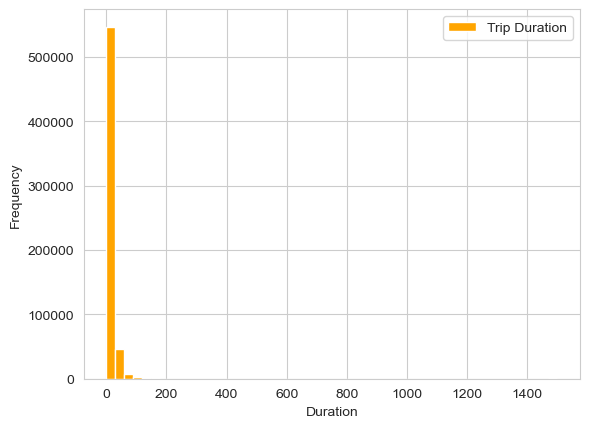

In [67]:
%matplotlib inline
label = 'trip_duration'
plt.hist(bike_data[label] , bins=50, color='orange', label='Trip Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.legend()
plt.show()


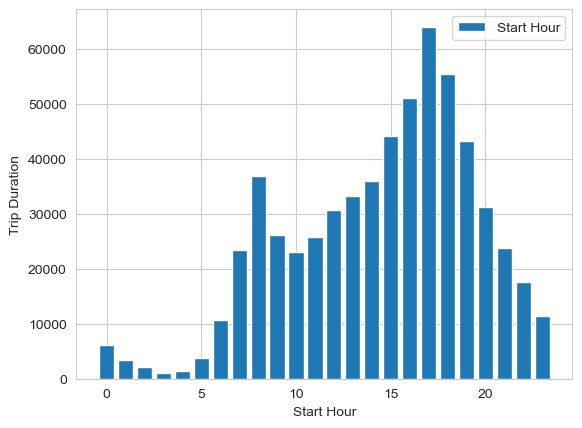

In [68]:
plt.bar(bike_data['start_Hour'].value_counts().index, bike_data['start_Hour'].value_counts().values, label='Start Hour') # Trip duration day/ hour
plt.xlabel('Start Hour')
plt.ylabel('Trip Duration')
plt.legend()
plt.show()

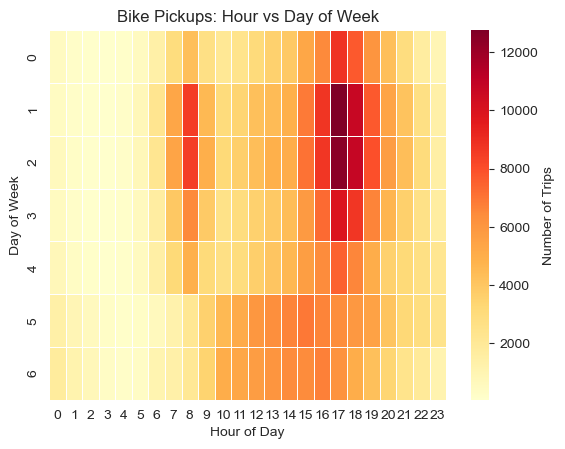

In [69]:
## showing patterns in pickup/drop-off times
heatmap_data = bike_data.groupby(['start_Weekday', 'start_Hour']).size().unstack(fill_value=0) #  if values null->  fill_value=0 # unstack converts 2D array like satrt_week,start_Hour(Monday, 8AM)
plt.Figure(figsize=(15,8)) # figure size
sns.heatmap(heatmap_data, annot=False, cmap='YlOrRd', fmt='d',linewidths=0.5, cbar_kws={'label': 'Number of Trips'}) # ploting and hows nuber inside each cell
plt.title('Bike Pickups: Hour vs Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

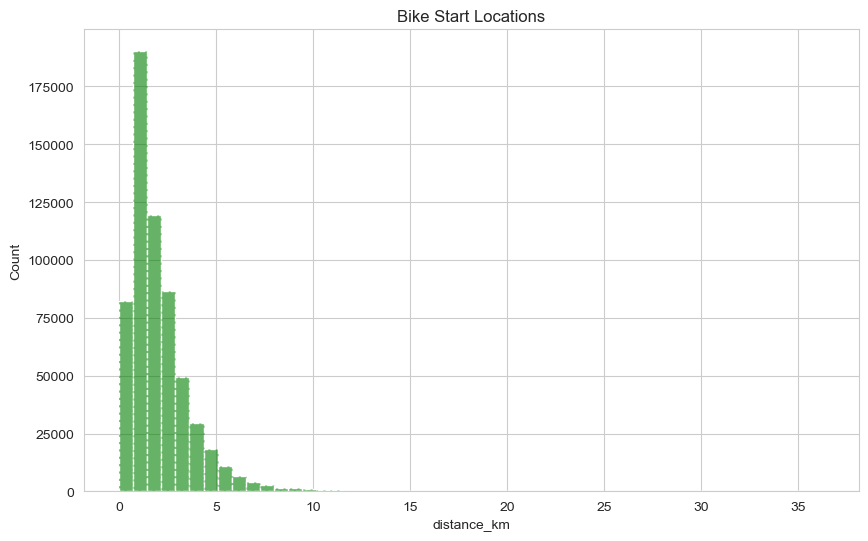

In [70]:

# Seaborn makes things automatically prettier
sns.set_style("whitegrid")  # Clean background
plt.figure(figsize=(10, 6))
sns.histplot(data = bike_data, x='distance_km', alpha=0.6, bins=50, linestyle='dashed', color='green')
plt.title('Bike Start Locations')
plt.show()

In [71]:
# checking ist colum droped or not
bike_data

,trip_duration,start_day,start_month,start_Hour,start_Weekday,ended_day,ended_month,ended_Hour,ended_Weekday,is_Weekend,is_rush_hour,same_day_trip,distance_km
0,6.040467,16,4,13,2,16,4,13,2,0,0,1,0.864757
2,4.736733,16,4,6,2,16,4,6,2,0,0,1,0.865001
4,33.060450,16,4,19,2,16,4,20,2,0,1,1,10.044873
6,2.401483,16,4,10,2,16,4,10,2,0,0,1,1.111949
7,5.425483,15,4,22,1,15,4,22,1,0,0,1,1.111949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
664194,12.306883,1,4,8,1,1,4,8,1,0,1,1,3.262756
664195,8.060150,1,4,8,1,1,4,8,1,0,1,1,2.334943
664196,9.329200,9,4,8,2,9,4,8,2,0,1,1,2.334943
664197,5.721500,20,4,10,6,20,4,10,6,1,0,1,1.353120


# Train a Regression model 

### ater separating the dataset, we now have numpy arrays named **X** containing the features and **y** containing the labels.

#### Befoure traing Model See what type of data you have for Regression supports numeric only
#### print(bike_data.dtypes)

In [72]:
# Separate features and labels # using 2D [[]] for Ml traing even if one future
X, y = bike_data[['start_day',	'start_month',	'start_Hour',	'start_Weekday',	'ended_day',	'ended_month',	'ended_Hour',	'ended_Weekday',	'is_Weekend',	'is_rush_hour',	'same_day_trip',	'distance_km']].values, bike_data['trip_duration'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')
print("X shape:", X.shape)
print("y shape:", y.shape)


Features:
[[16.          4.         13.          2.         16.          4.
  13.          2.          0.          0.          1.          0.86475722]
 [16.          4.          6.          2.         16.          4.
   6.          2.          0.          0.          1.          0.86500117]
 [16.          4.         19.          2.         16.          4.
  20.          2.          0.          1.          1.         10.04487272]
 [16.          4.         10.          2.         16.          4.
  10.          2.          0.          0.          1.          1.11194927]
 [15.          4.         22.          1.         15.          4.
  22.          1.          0.          0.          1.          1.11194927]
 [16.          4.         12.          2.         16.          4.
  13.          2.          0.          0.          1.          2.0556121 ]
 [16.          4.         12.          2.         16.          4.
  12.          2.          0.          0.          1.          6.91123389]
 [1

In [73]:

print(bike_data.dtypes)

trip_duration    float64
start_day          int32
start_month        int32
start_Hour         int32
start_Weekday      int32
ended_day          int32
ended_month        int32
ended_Hour         int32
ended_Weekday      int32
is_Weekend         int32
is_rush_hour       int32
same_day_trip      int32
distance_km      float64
dtype: object


In [74]:

#  split Train and test data sets
from sklearn.model_selection import train_test_split

# Split data 90%-10% into training set and test set  becouse we have more data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 423959 rows
Test Set: 181697 rows


In [75]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set

model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


### Evaluate the Trained Model
#### make prediction of trained model

In [76]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,np.round(y_test[:10]))

Predicted labels:  [ 2. 49. 53. 54.  4.  6.  3.  1. 50.  2.]
Actual labels   :  [ 2. 10. 25. 56. 10. 18.  9.  2.  8.  8.]


## Gettting predicted values

#### Predicted labels:  [ 2. 49. 53. 54.  4.  6.  3.  1. 50.  2.]
#### Actual labels   :  [ 2. 10. 25. 56. 10. 18.  9.  2.  8.  8.]

## Now ploting the Trained Model Performance

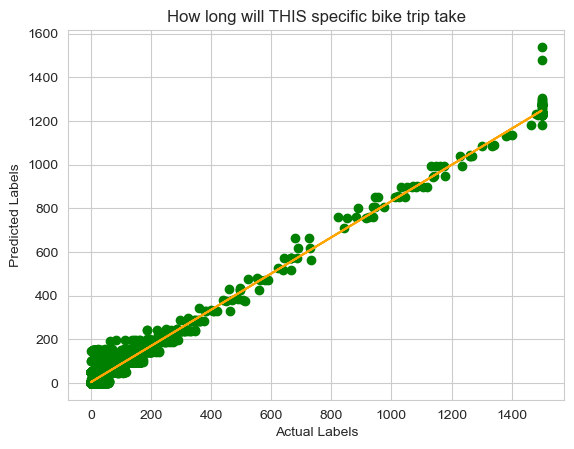

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test , predictions, color='green')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('How long will THIS specific bike trip take')

# overlay the regression line
t = np.polyfit(y_test , predictions, 1)
z = np.poly1d(t)
plt.plot(y_test,z(y_test), color='orange')
plt.show()

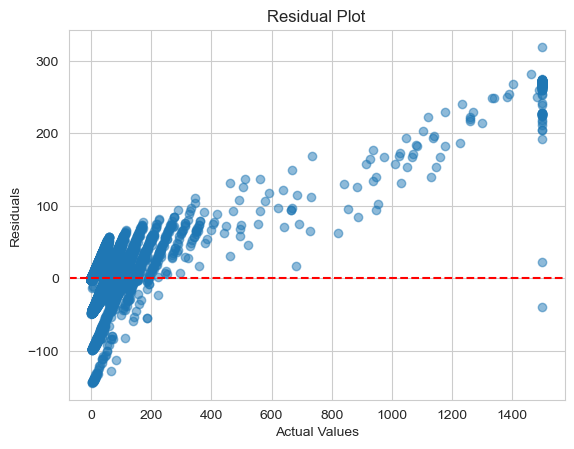

In [78]:
## Residuals plot shows the difference between actual and predicted values 

residuals = y_test - predictions
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


## Checking Matrics 

In [79]:

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R²:", r2_score(y_test, predictions))
print("MAE:", mean_absolute_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))

R²: 0.8182203766964855
MAE: 12.88030660390307
RMSE: 19.68708750270322


## Checking Cross-validaton

In [80]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validated R²:", scores)

Cross-validated R²: [0.83438468 0.87889435 0.85370983 0.46592032 0.74511304]


## Testing Model performance by Create new input data

In [83]:
# giving inputs for model to prdict Trip duration fro one location to another location

#[trip_duration	start_day	start_month	start_Hour	start_Weekday	ended_day	ended_month	,ended_Hour	
# ended_Weekday	is_Weekend	is_rush_hour	same_day_trip	distance_km]
new_trip =  [[1,	4,	8,  1,	1,	4,	8,	1,	0,	1,	1,	5.334943]]


# Make prediction
predicted_duration = model.predict(new_trip)
print(f"Predicted trip duration: {predicted_duration[0]:.1f} minutes , happy Jorny")

Predicted trip duration: 7.1 minutes , happy Jorny
